# Basic ML Model for Text Classification


In this , we'll learn how to implement a text classification task using machine learning.
we'll learn to create basic NLP based features that can be created from the text and we'll then test the model on the test data set to evaluate it's performance.

the task is to build a machine learning model to classify whether a particular tweet is hate speech or not. 

# Step 1: Data loading

In [1]:
# load the data

import numpy as np
import pandas as pd

df=pd.read_csv(r'C:\Users\harshit\Downloads\classification\NLP\final_dataset_basicmlmodel.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [2]:
# label=1 : hate speech
#label=0 : not a hate speech

In [ ]:
# for index,tweet in enumerate(df['tweet'][0:5]):
    print(index+1,'.',tweet)

# Step 2:  Data cleaning

In [33]:
import re
def clean_text(text):
    text=re.sub(r'[^a-zA-Z\']',' ',text)   # Filter to allow only alphabets
    text=re.sub(r'[^\x00-\x7F]+', '',text)  # Remove Unicode characters
    text=text.lower()                      # Convert to lowercase to maintain consistency
    return text

In [34]:
df['clean_text']=df.tweet.apply(lambda x: clean_text(x))

# Step 3: Feature engineering

extraction of more information from existing data. we are not adding any new data here, but, actually making the data we already have more useful

The machine learning model does not understand text directly, so we create numerical features that reperesent the underlying text.

In [50]:
from wordcloud import STOPWORDS
print(STOPWORDS)


{'should', 'how', 'been', 'can', "didn't", 'you', 'down', 'since', 'were', "let's", 'he', "shouldn't", "we'll", 'had', 'be', 'are', 'it', 'i', "haven't", 'then', 'ever', "they'll", 'into', "couldn't", 'in', 'we', 'itself', 'also', "i'd", 'again', "i'll", "when's", "that's", 'her', 'otherwise', 'some', 'did', 'off', 'could', 'below', 'no', 'cannot', 'herself', "i'm", 'after', "you've", 'being', 'as', 'both', 'yourself', "he'd", 'www', "he'll", 'has', 'through', 'himself', 'k', 'whom', 'doing', 'before', 'from', "wouldn't", 'yourselves', 'or', 'have', 'there', 'like', 'what', 'me', 'its', 'because', 'most', 'such', "she'll", 'that', 'own', 'and', "they're", 'my', "it's", 'having', "you'll", 'between', 'hers', 'those', 'him', 'over', "aren't", 'ourselves', 'ours', 'each', 'this', 'against', "where's", 'out', 'ought', 'at', "here's", 'more', 'to', 'not', "you're", 'up', 'once', "we'd", 'by', 'shall', 'why', "there's", 'if', "they've", 'very', 'is', 'does', 'of', 'further', "doesn't", "she'

In [48]:
def gen_freq(text):        #Generate word frequency 
    wrd_lst=[]              #Will store the list of words
    for tw_wrd in text.split():       #Loop over all the tweets and extract words into word_list
        wrd_lst.extend(tw_wrd)
    wrd_freq=pd.Series(wrd_lst).value_counts()   #Create word frequencies using word_list
    wrd_freq=wrd_freq.drop(labels=STOPWORDS,errors='ignore')     #Drop the stopwords during the frequency calculation
    return wrd_freq
        

In [49]:
a=gen_freq(df.clean_text.str)
a.head()

user     3351
amp       439
love      320
day       254
trump     214
dtype: int64

In [64]:
#Check whether a negation term is present in the text
def any_neg(words):
    for word in words:
        if word in ['n','no','not','non'] or re.search(r"\wn't", word):
            return 1
    else:
        return 0
        

In [65]:
#Check whether one of the 100 rare words is present in the text

def any_rare(words,rare_100):
    for word in words:
        if word in rare_100:
            return 1
    else:
         return 0

In [66]:
#Check whether prompt words are present

def is_qstn(words):
    for word in words:
        if word in ['who','when','why','what','whom','how']:
            return 1
    else:
        return 0

In [67]:
wrd_freq=gen_freq(df.clean_text.str)
rare_100=wrd_freq[-100:]
df['word_count']=df.clean_text.str.split().apply(lambda x: len(x))
df['any_neg']=df.clean_text.str.split().apply(lambda x: any_neg(x))
df['any_rare']=df.clean_text.str.split().apply(lambda x: any_rare(x,rare_100))
df['is_qstn']=df.clean_text.str.split().apply(lambda x: is_qstn(x))
df['char_count']=df.clean_text.apply(lambda x: len(x))

In [68]:
gen_freq(df.clean_text.str)[:10]


user      3351
amp        439
love       320
day        254
trump      214
happy      207
will       191
people     186
new        171
u          158
dtype: int64

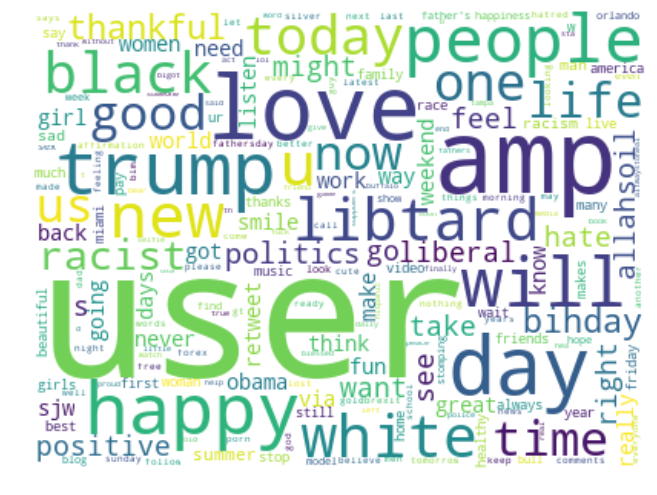

In [75]:
# generate word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc_new=WordCloud(width=400,height=300, max_words=200, background_color='white').generate_from_frequencies(wrd_freq)

plt.figure(figsize=(11,10))
plt.imshow(wc_new, interpolation='bilinear')
plt.axis('off')
plt.show()

In [69]:
df.head()

,id,label,tweet,clean_text,word_count,any_neg,any_rare,is_qstn,char_count
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is s...,18,0,0,1,102
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can't us...,19,1,1,0,122
2,3,0,bihday your majesty,bihday your majesty,3,0,0,0,21
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...,12,0,0,0,86
4,5,0,factsguide: society now #motivation,factsguide society now motivation,4,0,0,0,39


# Step 4: splitting the data into train & test 

In [87]:
from sklearn.model_selection import train_test_split
x=df[['word_count','any_neg','any_rare','is_qstn','char_count']]
y=df.label
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Step 5: Training of a model

In [88]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
model=gnb.fit(x_train,y_train)

# Step 6: Testing of a model

In [89]:
pred=model.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

# Step 7: Evaluation of a model

In [91]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, pred)*100, "%")

Accuracy: 59.4852240229 %
